"AIM: Select appropriate sensors/columns/features from multidimensional time series data"
@author: Ajay Arunachalam

In [ ]:
import pandas as pd
import numpy as np
import operator, statistics
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from msda.msda import *
%matplotlib inline

# Import time-series data

## The raw sensor data includes 6 sensors logging data every 2 minutes ##
## The columns include
Date, Time, Light, Temp Air, Temp Soil, Soil Moisture, Soil Moisture, Soil Moisture
'''
The code includes:-
1) Time series analysis
2) The variation of each sensor column wrt time (increasing, decreasing, equal)
3) How each column values varies wrt other column, and the maximum variation ratio between each column wrt other column
4) Relationship establishment with trend array to identify most appropriate sensor.
5) User can select window length and then check average value and standard deviation accross each window for each sensor column
6) It provides count of growth/decay value for each sensor column values above or below a threshold value
7) Feature Engineering 
    a) Features involving trend of values across various aggregation windows: change and rate of change in average,
    std. deviation across window
    b) Ratio of changes, growth rate with std. deviation
    c) Change over time
    d) Rate of change over time
    e) Growth or decay
    f) Rate of growth or decay
    g) Count of values above or below a threshold value 
'''

In [2]:
df = pd.read_csv('./data/Data1.csv')
df.shape

(210, 8)

In [3]:
df.head()

,Date,Time,Light,Temp_Air,Temp_Soil,Soil_Moisture_1,Soil_Moisture_2,Soil_Moisture_3
0,22-05-2019,08:40,64.0,23.1875,20.5625,756.0,780.0,1002.0
1,22-05-2019,08:42,64.0,23.1250,20.5625,755.0,782.0,1002.0
2,22-05-2019,08:44,66.0,23.0000,20.5625,758.0,782.0,1001.0
3,22-05-2019,08:46,71.0,22.9375,20.5625,756.0,782.0,1002.0
4,22-05-2019,08:48,71.0,22.8750,20.5625,756.0,783.0,1003.0


In [4]:
df.tail()

,Date,Time,Light,Temp_Air,Temp_Soil,Soil_Moisture_1,Soil_Moisture_2,Soil_Moisture_3
205,22-05-2019,15:32,69.0,22.000,20.025,758.0,783.0,998.0
206,22-05-2019,15:34,66.0,22.125,22.000,760.0,780.0,999.0
207,22-05-2019,15:36,51.0,22.125,20.625,758.0,783.0,999.0
208,22-05-2019,15:38,62.0,22.000,20.625,755.0,781.0,1003.0
209,22-05-2019,15:40,66.0,20.225,23.825,757.0,788.0,999.0


In [5]:
df.columns

Index(['Date', 'Time', 'Light', 'Temp_Air', 'Temp_Soil', 'Soil_Moisture_1',
       'Soil_Moisture_2', 'Soil_Moisture_3'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             210 non-null    object 
 1   Time             210 non-null    object 
 2   Light            210 non-null    float64
 3   Temp_Air         210 non-null    float64
 4   Temp_Soil        210 non-null    float64
 5   Soil_Moisture_1  210 non-null    float64
 6   Soil_Moisture_2  210 non-null    float64
 7   Soil_Moisture_3  210 non-null    float64
dtypes: float64(6), object(2)
memory usage: 13.2+ KB


# Check missing values with missing function 

In [10]:
# Check missing individual column
returned = Preprocessing.missing(df.Light)
print(returned)

0


In [11]:
print("Missing information for whole dataset")
print("Missing by row", df.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row Date               0
Time               0
Light              0
Temp_Air           0
Temp_Soil          0
Soil_Moisture_1    0
Soil_Moisture_2    0
Soil_Moisture_3    0
dtype: int64
Missing by col 0      0
1      0
2      0
3      0
4      0
      ..
205    0
206    0
207    0
208    0
209    0
Length: 210, dtype: int64


# Find variation in each column (Inc, Dec, Eql) from its previous values

In [12]:
print("Trend information for each column in the dataset")
print("Dictionary of each column with variation count\n", df.apply(FeatureSelection.count_trend, axis=0)) # col

Trend information for each column in the dataset
Dictionary of each column with variation count
 Date                 {'Inc': 0, 'Dec': 0, 'Eql': 209}
Time                 {'Inc': 209, 'Dec': 0, 'Eql': 0}
Light               {'Inc': 74, 'Dec': 78, 'Eql': 57}
Temp_Air           {'Inc': 23, 'Dec': 108, 'Eql': 78}
Temp_Soil           {'Inc': 63, 'Dec': 59, 'Eql': 87}
Soil_Moisture_1     {'Inc': 84, 'Dec': 81, 'Eql': 44}
Soil_Moisture_2    {'Inc': 84, 'Dec': 109, 'Eql': 16}
Soil_Moisture_3     {'Inc': 87, 'Dec': 67, 'Eql': 55}
dtype: object


# Find maximum variation in each column wrt time

In [13]:
# Dictionary of each column with variation
Light_trend = FeatureSelection.count_trend(df.Light)
Tempsoil_trend=FeatureSelection.count_trend(df.Temp_Soil)
Tempair_trend=FeatureSelection.count_trend(df.Temp_Air)
Soil_m1_trend=FeatureSelection.count_trend(df.Soil_Moisture_1)
Soil_m2_trend=FeatureSelection.count_trend(df.Soil_Moisture_2)
Soil_m3_trend=FeatureSelection.count_trend(df.Soil_Moisture_3)

In [14]:
# Values showing maximum variation in each column wrt Time
light = max(Light_trend.items(), key=operator.itemgetter(1))[0]
soil_temp= max(Tempsoil_trend.items(),key=operator.itemgetter(1))[0]
air_temp= max(Tempair_trend.items(),key=operator.itemgetter(1))[0]
soil_m1= max(Soil_m1_trend.items(),key=operator.itemgetter(1))[0]
soil_m2= max(Soil_m2_trend.items(),key=operator.itemgetter(1))[0]
soil_m3= max(Soil_m3_trend.items(),key=operator.itemgetter(1))[0]

In [15]:
print('Max. Variation Involved in each Sensor Column values are:')
print('Note: Inc-Increasing ; Dec-Decreasing ; Eq-Equal ')
print('For Light Column:',light)
print('For Temp_Air Column:',air_temp)
print('For Temp_Soil Column:',soil_temp)
print('For Soil_Moisture_1 Column:',soil_m1)
print('For Soil_Moisture_2 Column:',soil_m2)
print('For Soil_Moisture_3 Column:',soil_m3)

Max. Variation Involved in each Sensor Column values are:
Note: Inc-Increasing ; Dec-Decreasing ; Eq-Equal 
For Light Column: Dec
For Temp_Air Column: Dec
For Temp_Soil Column: Eql
For Soil_Moisture_1 Column: Inc
For Soil_Moisture_2 Column: Dec
For Soil_Moisture_3 Column: Inc


# forming variation-based array to define how each column value differs from its previous value

In [16]:
trend=list()
i=0
av=df.to_numpy()
while i!=len(av)-1:
    vg=[]
    for k, v in zip(av[i], av[i+1]):
        if k==v:
            vg.append('Eq')
        elif k>v:
            vg.append('Dec')
        elif k<v:
            vg.append('Inc')
    i+=1
    trend.append(vg)

mat = np.array(trend)
print(mat)

[['Eq' 'Inc' 'Eq' ... 'Dec' 'Inc' 'Eq']
 ['Eq' 'Inc' 'Inc' ... 'Inc' 'Eq' 'Dec']
 ['Eq' 'Inc' 'Inc' ... 'Dec' 'Eq' 'Inc']
 ...
 ['Eq' 'Inc' 'Dec' ... 'Dec' 'Inc' 'Eq']
 ['Eq' 'Inc' 'Inc' ... 'Dec' 'Dec' 'Inc']
 ['Eq' 'Inc' 'Inc' ... 'Inc' 'Inc' 'Dec']]


# Calculate ratios for each variation in each column wrt other column values & finding max ratio to establish change of a given column wrt other column

In [17]:
# To print Ratios of Variations of Values in each column
cols = list(df.columns)
cols = cols[2:]
print('** Ratios of Variations Of Values of Each Sensor Column wrt other Sensor Column **')
print(' Note: Inc-Increasing ; Dec-Decreasing ; Eq-Equal ')
for i in cols:
    FeatureSelection.ratio(df,i)
    print('------------------------')

** Ratios of Variations Of Values of Each Sensor Column wrt other Sensor Column **
 Note: Inc-Increasing ; Dec-Decreasing ; Eq-Equal 
[['Eq' 'Inc' 'Eq' ... 'Dec' 'Inc' 'Eq']
 ['Eq' 'Inc' 'Inc' ... 'Inc' 'Eq' 'Dec']
 ['Eq' 'Inc' 'Inc' ... 'Dec' 'Eq' 'Inc']
 ...
 ['Eq' 'Inc' 'Dec' ... 'Dec' 'Inc' 'Eq']
 ['Eq' 'Inc' 'Inc' ... 'Dec' 'Dec' 'Inc']
 ['Eq' 'Inc' 'Inc' ... 'Inc' 'Inc' 'Dec']]
[['Eq' 'Inc' 'Eq' ... 'Dec' 'Inc' 'Eq']
 ['Eq' 'Inc' 'Inc' ... 'Inc' 'Eq' 'Dec']
 ['Eq' 'Inc' 'Inc' ... 'Dec' 'Eq' 'Inc']
 ...
 ['Eq' 'Inc' 'Dec' ... 'Dec' 'Inc' 'Eq']
 ['Eq' 'Inc' 'Inc' ... 'Dec' 'Dec' 'Inc']
 ['Eq' 'Inc' 'Inc' ... 'Inc' 'Inc' 'Dec']]
[['Eq' 'Inc' 'Eq' ... 'Dec' 'Inc' 'Eq']
 ['Eq' 'Inc' 'Inc' ... 'Inc' 'Eq' 'Dec']
 ['Eq' 'Inc' 'Inc' ... 'Dec' 'Eq' 'Inc']
 ...
 ['Eq' 'Inc' 'Dec' ... 'Dec' 'Inc' 'Eq']
 ['Eq' 'Inc' 'Inc' ... 'Dec' 'Dec' 'Inc']
 ['Eq' 'Inc' 'Inc' ... 'Inc' 'Inc' 'Dec']]
[['Eq' 'Inc' 'Eq' ... 'Dec' 'Inc' 'Eq']
 ['Eq' 'Inc' 'Inc' ... 'Inc' 'Eq' 'Dec']
 ['Eq' 'Inc' 'Inc' ... 'De

# Evaluate change & rate of change in average, std. deviation across window

In [18]:
print('--------------------------------------------------------------------')
print('** Avg. and Standard deviations for each Sensor Column **')
FeatureSelection.window(df=df)

--------------------------------------------------------------------
** Avg. and Standard deviations for each Sensor Column **
Enter Time in Minutes for the Window: (Must be a Multiple of 2):10
Rate of Change of AVG Across Window For Sensor Column Light: 63.22857142857143
Rate of Change of STD Across Window For Sensor Column Light: 4.258943346730935
Rate of Change of AVG Across Window For Sensor Column Temp_Air: 22.417083333333334
Rate of Change of STD Across Window For Sensor Column Temp_Air: 0.29864460799447445
Rate of Change of AVG Across Window For Sensor Column Temp_Soil: 20.939821428571427
Rate of Change of STD Across Window For Sensor Column Temp_Soil: 0.5650260796431359
Rate of Change of AVG Across Window For Sensor Column Soil_Moisture_1: 755.8285714285714
Rate of Change of STD Across Window For Sensor Column Soil_Moisture_1: 5.002229665551033
Rate of Change of AVG Across Window For Sensor Column Soil_Moisture_2: 783.4285714285714
Rate of Change of STD Across Window For Sensor

# Plot the sensors/features to verify slope For Sensors/Columns Showing Max. Variation

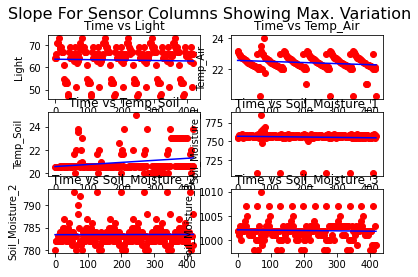

In [19]:
FeatureSelection.plot(df, logging_interval=2)

# Derive new features*** 
Change over time, Rate of change over time, Growth and/or decay, Rate of growth and/or decay, No. of elements above threshold (mean) value for growth and/or decay, etc.
'''
Feature Engineering 
    a) Features involving trend of values across various aggregation windows: change and rate of change in average,
    std. deviation across window
    b) Ratio of changes, growth rate with std. deviation
    c) Change over time
    d) Rate of change over time
    e) Growth and/or decay
    f) Rate of growth and/or decay
    g) Count of Growth/Decay values above or below a threshold value 
'''

In [20]:
change_ovr_time,rate_of_change_ovr_time,growth_decay,rate_growth_decay,(threshold_growth_decay,count_decay_growth) = FeatureSelection.features(df=df, start_sensor_column_index=2)

Count of Growth/Decay value for each Sensor Column Values above or below a threshold value:
 {'Light': 74, 'Temp_Air': 101, 'Temp_Soil': 63, 'Soil_Moisture_1': 84, 'Soil_Moisture_2': 84, 'Soil_Moisture_3': 142}


# Plot each sensor column & the derived features with correlation (slope)
1) Feature: Change over time
2) Feature: Rate of change over time
3) Feature: Growth decay
4) Feature: Rate of growth decay
5) Feature: threshold growth decay, count growth decay

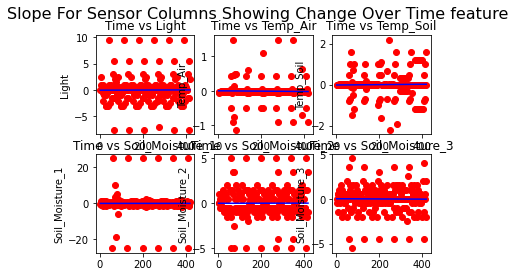

In [21]:
FeatureSelection.plot_change_ovr_time(df=df, feature=change_ovr_time, logging_interval=2)

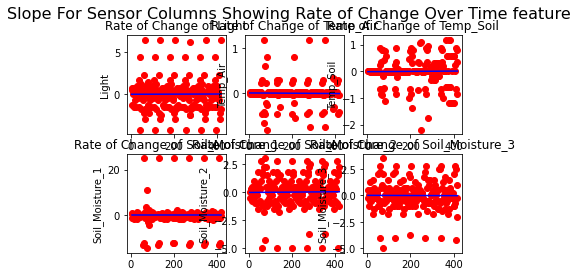

In [22]:
FeatureSelection.plot_rate_of_change_ovr_time(df=df, feature=rate_of_change_ovr_time, logging_interval=2)

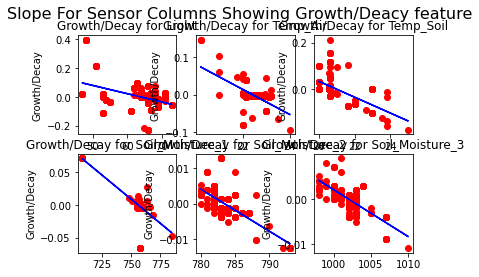

In [23]:
FeatureSelection.plot_growth_decay(df=df, feature=growth_decay, logging_interval=2)

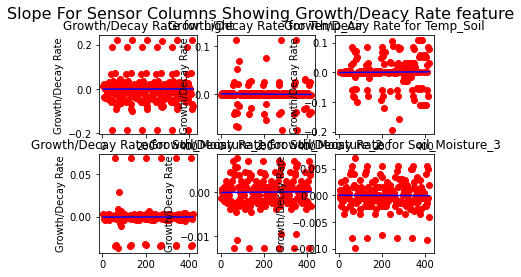

In [24]:
FeatureSelection.plot_rate_growth_decay(df=df, feature=rate_growth_decay, logging_interval=2)

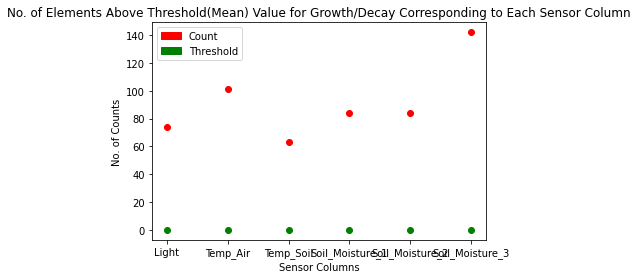

In [25]:
FeatureSelection.Threshold_Counts(df=df,feature=(threshold_growth_decay,count_decay_growth))

# CONCLUSION

## The plots shows each sensor values and features with correlation (slope) is provided.

The most appropriate sensors to be selected based on our approach would be then 'Temp_Soil', 'Light' in the 
order of highest importance.

The reasons are as follows:-
   * These column values mostly remain constant or increases over time as seen from the slope.
   * The rate of change of column values remain constant or increases over time as seen from the slope.
   * Maximum variation within the column values shows an increasing slope.
   * It has constant decay slope.
   * Rate of Decay is positive or constant.
   * It has moderate number of values above the threshold value (i.e., mean).

From our method of array values evaluation, it can be observed that the various characteristics involved in each sensor column help in selection of most appropriate sensor column by observing the plot of the characteristics, and corresponding slope.